### Gaussian_process basic

x is determistic.

w is probalistic.

y is probalistic.

$t_n = y_n + \epsilon _n$

$p(t|Y)=N(t|y,\beta^{-1}I_{N})$

$p(y) = N(y|0,K)$

$ y= k(x)^{T}(K+\lambda *I_N)^{-1}t$

my_kernel is as follows.

$k(x_n,x_m)=\theta_{0}exo(-\theta_1*0.5*(x_n-x_m^{2}))+\theta_{2} +\theta_{3}x_{n}^{t} x_{m}$

In [57]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [65]:
#### kernel
def my_kernel(x_n,x_m,a_1=30.0,a_2=25,a_3=1.0,a_4=10.0):
    return a_1*np.exp(-a_2*0.5*np.dot(x_n-x_m,x_n-x_m))+a_3+a_4*np.dot(x_n-x_m,x_n-x_m)
    

In [66]:
###generate samples
x=np.array([0.000000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000])
t=np.array([0.349486,0.830839,1.007332,0.971507,0.133066,0.166823,-0.848307,-0.445686,-0.563567,0.261502])

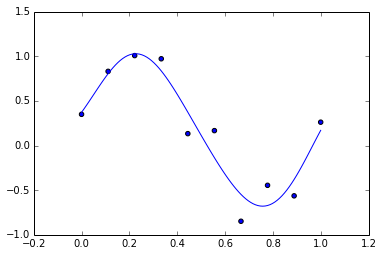

In [67]:
### gram matrix
a=np.array([my_kernel(i,j) for i in x for j in x])
K = a.reshape([10,10])
#### prediction
def pred(new,x,K,t):
    aux = np.array([my_kernel(i,new) for i in x])
    return np.dot(aux,np.dot(np.linalg.inv(np.identity(10)+K),t))
  
x_ziku = np.linspace(0,1,100)
y_ziku = [ pred(i,x,K,t) for i in x_ziku]
plt.scatter(x,t)
plt.plot(x_ziku,y_ziku)
plt.show()